# Import Needed Modules

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data In

## Using Pandas read_csv to bring in the local CSV

In [19]:
book_data = pd.read_csv("best_book_21st.csv")

## Use columns() function to see what columns are included in the data and to see the exact spelling of the column.

In [20]:
book_data.columns

Index(['id', 'title', 'series', 'author', 'book_link', 'genre',
       'date_published', 'publisher', 'num_of_page', 'lang', 'review_count',
       'rating_count', 'rate', 'award'],
      dtype='object')

# Manipulate and Clean Data

## Start by dropping unneeded columns using the drop() function

## Then use the info() function to gather information and see what else is needed to clean the data

In [21]:
alt_book_data = book_data.drop(columns=['id', 'series', 'book_link', 'publisher', 'lang', 'award'])

alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10018 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           10018 non-null  object 
 1   author          10003 non-null  object 
 2   genre           9019 non-null   object 
 3   date_published  9970 non-null   object 
 4   num_of_page     9737 non-null   float64
 5   review_count    10003 non-null  object 
 6   rating_count    10003 non-null  object 
 7   rate            10003 non-null  float64
dtypes: float64(2), object(6)
memory usage: 626.2+ KB


## Use value_counts() function to find duplicate titles

In [22]:
alt_book_data['title'].value_counts()

Bloodlines (Bloodlines, #1)                                              4
The Shack                                                                3
The God Delusion                                                         3
Prey                                                                     3
Dominion                                                                 3
                                                                        ..
Shakespeare Saved My Life                                                1
The Power (The Secret, #2)                                               1
Henna House                                                              1
I Remember Running: The Year I Got Everything I Ever Wanted - and ALS    1
The Immortal Hunter (Argeneau #11; Rogue Hunter #2)                      1
Name: title, Length: 9098, dtype: int64

## Use drop_duplicates() function to drop any duplicate titles making sure to keep the first instance of each duplicate so that we don't lose any data

In [23]:
alt_book_data.drop_duplicates(subset='title', keep='first', inplace=True)

## Use isnull().sum() to see the number of missing values in the dataset

In [24]:
alt_book_data.isnull().sum()

title               0
author             15
genre             974
date_published     47
num_of_page       278
review_count       15
rating_count       15
rate               15
dtype: int64

## Use dropna() function to remove the rows that contain null values

In [25]:
alt_book_data.dropna(inplace=True)

## Use split() function to drop the comma and everything after it in the genre column

## Use sample() function to view what data looks like at this point

In [26]:
alt_book_data['genre']=alt_book_data['genre'].str.split(',').str[0]

alt_book_data.sample(10)

,title,author,genre,date_published,num_of_page,review_count,rating_count,rate
2345,The Plague of Doves,Louise Erdrich,Fiction,April 29th 2008,313.0,"2,042","14,651",3.79
5724,Is It Just Me?,Miranda Hart,Nonfiction,October 11th 2012,323.0,"1,829","17,759",3.82
207,The Travelers Within: Into The Unknown,Daniel Mode,Travel,"August 2020 ,",389.0,20,70,3.93
5796,Kokoda,Peter FitzSimons,History,July 2004,490.0,103,"1,330",4.27
8112,The Solace of Leaving Early,Haven Kimmel,Fiction,May 13th 2003,288.0,507,"3,207",3.79
4987,"A Dog's Promise (A Dog's Purpose, #3)",W. Bruce Cameron,Fiction,October 15th 2019,384.0,402,"2,563",4.34
4546,The Bullet Collection,"Patricia Sarrafian Ward,Patricia Ward",Cultural,March 5th 2003,304.0,4,40,4.28
3591,"Thief's Covenant (Widdershins Adventures, #1)",Ari Marmell,Fantasy,February 21st 2012,273.0,320,"2,539",3.69
3056,"Positively Fifth Street: Murderers, Cheetahs, ...",James McManus,Nonfiction,March 1st 2004,448.0,189,"2,818",3.87
269,South of Broad,Pat Conroy,Fiction,August 11th 2009,514.0,"5,650","46,610",3.80


## Renamed the "rate" colum to "rating" using the rename() function

In [27]:
alt_book_data.rename(columns = {'rate':'rating'}, inplace = True)
alt_book_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7960 entries, 0 to 10017
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           7960 non-null   object 
 1   author          7960 non-null   object 
 2   genre           7960 non-null   object 
 3   date_published  7960 non-null   object 
 4   num_of_page     7960 non-null   float64
 5   review_count    7960 non-null   object 
 6   rating_count    7960 non-null   object 
 7   rating          7960 non-null   float64
dtypes: float64(2), object(6)
memory usage: 559.7+ KB


# Analyze Data and Visualize Data

## Use mean() function to find the average rating of all the titles

In [28]:
alt_book_data['rating'].mean()

3.9643643216080404

## Use .sum() to find the total number of pages in all of the books combined

In [29]:
alt_book_data['num_of_page'].sum()

2882223.0

## Use .nlargest() to create a new dataframe that shows the 5 titles with the highest number of pages

In [30]:
top_titles = alt_book_data.nlargest(5, 'num_of_page')

print(top_titles[['title', 'num_of_page']])

                                                  title  num_of_page
5490           Harry Potter Boxset (Harry Potter, #1-7)       4167.0
2900  A Song of Ice and Fire (A Song of Ice and Fire...       4081.0
9202  The Dark Tower Series: Books 1-7 (The Dark Tow...       3914.0
7832       Harry Potter Collection (Harry Potter, #1-6)       3342.0
6124  The Collected Joe Abercrombie: The Blade Itsel...       3008.0


## Use .count() function along with .nlargest() function to show the 5 authors with the most titles as well as show that information on a graph

In [31]:
top_authors = alt_book_data.groupby('author')['title'].count().nlargest(5)

print(top_authors)

author
Lynsay Sands        26
Stephen King        21
Kelley Armstrong    20
Lucian Bane         20
Richelle Mead       20
Name: title, dtype: int64


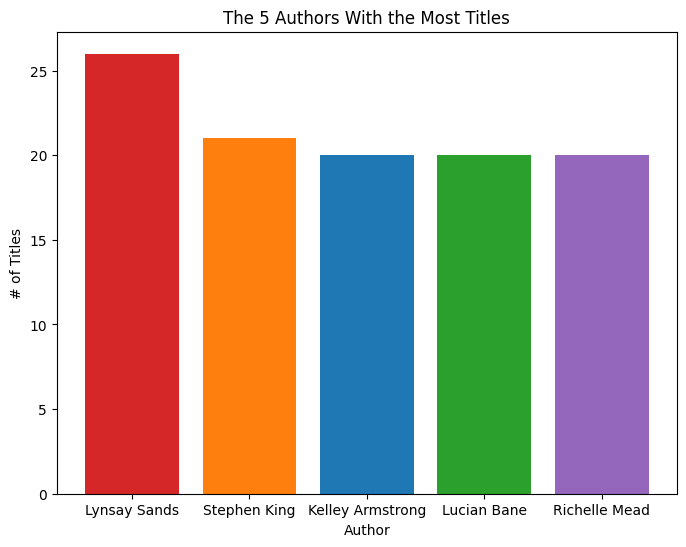

In [32]:
plt.figure(figsize=(8, 6))
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:purple']
plt.bar(top_authors.index, top_authors.values, color=colors)
plt.title('The 5 Authors With the Most Titles')
plt.xlabel('Author')
plt.ylabel('# of Titles')
plt.show()

## Use .mean() function along with .nlargest() function to show top 5 genres based on ratings as well as show that information on a graph

In [33]:
top_genres = alt_book_data.groupby('genre')['rating'].mean().nlargest(5)

print(top_genres)

genre
Humanities       4.610
Urban            4.509
Inspirational    4.490
Classics         4.340
Labor            4.340
Name: rating, dtype: float64


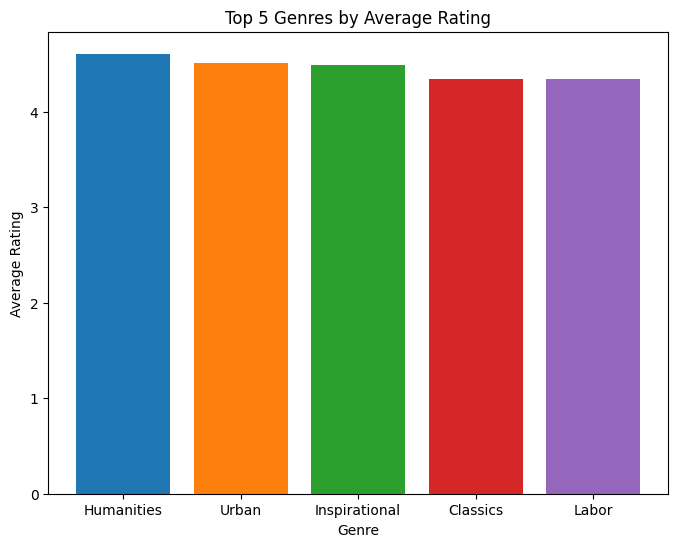

In [35]:
plt.figure(figsize=(8, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.bar(top_genres.index, top_genres.values, color=colors)
plt.title('Top 5 Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

# Interpret Data

This is where I will add my interpretation of the above data